# Real-world Data Wrangling

In [1]:
!python3 -m pip install kaggle==1.6.12

In [2]:
!pip3 install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached numpy-1.24.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.6 kB)
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached numpy-1.24.3-cp311-cp311-macosx_11_0_arm64.whl (13.8 MB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (

## 1. Gather data

### **1.1.** Problem Statement
In this project, I will be working with two datasets: meets.csv and openpowerlifting.csv. The meets.csv file contains records of all competitions (meets) from the OpenPowerlifting database, while openpowerlifting.csv includes details of the competitors who attended these meets along with their recorded statistics and lifts. By linking these two datasets, I aim to analyze performance patterns and the impact of various factors, such as competition type, athlete demographics, and individual performance metrics.

#### **Dataset 1**

Type: CSV File

Method: I selected this dataset from Kaggle because it offers a comprehensive collection of data relevant to my analysis, specifically focusing on performance patterns in powerlifting. The data was gathered by downloading the CSV file directly from the Kaggle platform, ensuring that it is well-structured and accessible for further analysis.

Dataset variables:

* `MeetID`:identifier for each powerlifting meet/event
* `Name`:Competitor's name
* `Sex`:Gender of the competitor
* `Equipment`:Indicates the type of equipment used which affects lifting performance
* `Age`:Age of the competitor, relevant for analyzing performance trends across different age groups.
* `Division`:Competitive division the athlete belongs to important for categorizing performance.
* `BodyweightKg`:The competitor's weight, necessary for weight class categorization and performance evaluation.
* `WeightClassKg`:Designates the weight class for competition.
* `Squat4Kg`:The weight attempted in the squat during the fourth attempt
* `BestSquatKg`:Best squat achieved, significant for evaluating performance in this discipline.
* `Bench4Kg`:The weight attempted in the bench press during the fourth attempt.
* `BestBenchKg`:Best bench press achieved
* `Deadlift4Kg`:The weight attempted in the deadlift during the fourth attempt
* `BestDeadliftKg`:Best deadlift achieved, another key performance metric
* `TotalKg`:The sum of the best lifts (squat, bench, deadlift), providing a comprehensive measure of an athlete's overall performance
* `Place`:Final placement in the competition, which reflects competitive success.
* `Wilks`:The Wilks score, which is a coefficient used to compare the strength of powerlifters across different body weights

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import requests
import os
import shutil
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1st data gathering and loading method
# Load the CSV file into a DataFrame
powerlifting_df = pd.read_csv('./CSV/openpowerlifting.csv')
# Display the first few rows of the DataFrame
powerlifting_df.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


#### Dataset 2

Type: CSV File

Method:  I chose the "meets.csv" file from the same Kaggle repository because it complements the primary dataset by focusing on detailed information about each powerlifting meet. This data is essential for understanding the competition environment and its influence on athlete performance.

I used the Kaggle API to gather this dataset, ensuring data consistency and easy integration into my analysis pipeline.

Here is a snippet of code used: 
```
os.environ['PATH'] += ':/home/jkatana/.local/bin'
# Check if kaggle is now accessible
!kaggle --version
# Use subprocess to call the Kaggle API command
# Download the meets.csv file into the CSV folder
subprocess.run(['kaggle', 'datasets', 'download', '-d', 'dansbecker/powerlifting-database', '-f', 'meets.csv', '--unzip', '-p', 'CSV'])

```
Dataset variables:

* `MeetID`:unique identifier of each meet
* `MeetPath`:Provides a pathway reference for the meet’s record.
* `Federation`:Identifies the governing body of the meet, which may affect the standards and rules.
* `Date`:The specific date of the meet
* `MeetCountry`,`MeetState`,`MeetTown`:Indicate the geographical location of the meet, important for regional analysis
* `MeetName`:name of the competition, which helps to identify and cross-reference specific events



In [3]:
#2nd data gathering and loading method
# Add the directory to PATH
os.environ['PATH'] += ':/home/jkatana/.local/bin'
# Check if kaggle is now accessible
!kaggle --version
# Use subprocess to call the Kaggle API command
# Download the meets.csv file into the CSV folder
subprocess.run(['kaggle', 'datasets', 'download', '-d', 'dansbecker/powerlifting-database', '-f', 'meets.csv', '--unzip', '-p', 'CSV'])


Kaggle API 1.6.12
Dataset URL: https://www.kaggle.com/datasets/dansbecker/powerlifting-database
License(s): unknown


  0%|          | 0.00/609k [00:00<?, ?B/s]

100%|██████████| 609k/609k [00:01<00:00, 451kB/s]


CompletedProcess(args=['kaggle', 'datasets', 'download', '-d', 'dansbecker/powerlifting-database', '-f', 'meets.csv', '--unzip', '-p', 'CSV'], returncode=0)

In [4]:
# Load the CSV file into a DataFrame
meets_df = pd.read_csv('./CSV/meets.csv')
meets_df.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.


### Quality Issue 1: Missing Values

In [5]:
#Inspecting the dataframe visually
powerlifting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        370571 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  object 
 8   Squat4Kg        1243 non-null    float64
 9   BestSquatKg     298071 non-null  float64
 10  Bench4Kg        1962 non-null    float64
 11  BestBenchKg     356364 non-null  float64
 12  Deadlift4Kg     2800 non-null    float64
 13  BestDeadliftKg  317847 non-null  float64
 14  TotalKg         363237 non-null  float64
 15  Place           385322 non-null  object 
 16  Wilks           362194 non-null  float64
dtypes: float64

In [6]:
#Inspecting the dataframe programmatically
powerlifting_df.isnull().sum()

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               239267
Division           15843
BodyweightKg        2402
WeightClassKg       3812
Squat4Kg          385171
BestSquatKg        88343
Bench4Kg          384452
BestBenchKg        30050
Deadlift4Kg       383614
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
dtype: int64

Issue and justification: 
* Issue: Missing Values
* Justification: Several columns have a significant number of missing values, particularly in the `Age`, `Squat4Kg`, `Bench4Kg`, and `Deadlift4Kg` columns. The `Age` column in particular affects analysis in terms of which Division people belong to and might require handling missing data

### Quality Issue 2: Invalid Values

In [7]:
#Inspecting the dataframe visually
powerlifting_df.describe()

,MeetID,Age,BodyweightKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Wilks
count,386414.000000,147147.000000,384012.000000,1243.000000,298071.000000,1962.000000,356364.000000,2800.000000,317847.000000,363237.000000,362194.000000
mean,5143.015804,31.668237,86.934912,107.036404,176.569941,45.722905,118.347509,113.597193,195.040633,424.000249,301.080601
std,2552.099838,12.900342,23.140843,166.976620,69.222785,151.668221,54.848850,170.201657,61.580675,196.355147,116.360396
min,0.000000,5.000000,15.880000,-440.500000,-477.500000,-360.000000,-522.500000,-461.000000,-410.000000,11.000000,13.730000
25%,2979.000000,22.000000,70.300000,87.500000,127.500000,-90.000000,79.380000,110.000000,147.500000,272.160000,237.380000
50%,5960.000000,28.000000,83.200000,145.000000,174.630000,90.250000,115.000000,157.500000,195.000000,424.110000,319.660000
75%,7175.000000,39.000000,100.000000,212.500000,217.720000,167.500000,150.000000,219.990000,238.140000,565.000000,379.290000
max,8481.000000,95.000000,242.400000,450.000000,573.790000,378.750000,488.500000,418.000000,460.400000,1365.310000,779.380000


In [8]:
#Inspecting the dataframe programmatically
# Define the columns to check for outliers
columns_to_check = ['Squat4Kg', 'BestSquatKg', 'Bench4Kg', 'BestBenchKg', 'Deadlift4Kg', 'BestDeadliftKg']

# Sort the DataFrame by each column to find outliers
for column in columns_to_check:
    # Sort values in ascending order
    sorted_df = powerlifting_df.sort_values(by=column)
    
    # Display the sorted DataFrame (you might want to limit the number of rows displayed)
    print(f"Sorted values for {column}:")
    print(sorted_df[[column]].head(10))  # Display top 10 values (smallest)
    print(sorted_df[[column]].tail(10))  # Display bottom 10 values (largest)
    print("\n" + "="*50 + "\n")  # Separator for clarity


Sorted values for Squat4Kg:
        Squat4Kg
385158    -440.5
235802    -432.5
49215     -425.0
382160    -420.0
154603    -416.0
382152    -415.0
385156    -410.0
382180    -407.5
52357     -392.5
382171    -385.0
        Squat4Kg
386404       NaN
386405       NaN
386406       NaN
386407       NaN
386408       NaN
386409       NaN
386410       NaN
386411       NaN
386412       NaN
386413       NaN


Sorted values for BestSquatKg:
        BestSquatKg
329943      -477.50
334617      -462.50
322150      -457.50
322533      -455.00
322534      -455.00
319894      -454.95
323993      -445.00
335749      -445.00
322004      -442.50
324547      -440.00
        BestSquatKg
386404          NaN
386405          NaN
386406          NaN
386407          NaN
386408          NaN
386409          NaN
386410          NaN
386411          NaN
386412          NaN
386413          NaN


Sorted values for Bench4Kg:
        Bench4Kg
2665      -360.0
51187     -340.0
49216     -320.0
4224      -320.0
111090    

Issue and justification: 
* Issue: Invalid values
* Justification:negative values for weight lifts are illogical

### Tidiness Issue 1: Same information in two different columns 
### `MeetPath` & `Federation` columns

In [9]:
#Inspecting the dataframe visually
print(meets_df[['Federation', 'MeetPath']].head())
print(meets_df[['Federation', 'MeetPath']].tail())

  Federation        MeetPath
0  365Strong  365strong/1601
1  365Strong  365strong/1602
2  365Strong  365strong/1603
3  365Strong  365strong/1604
4  365Strong  365strong/1605
     Federation                   MeetPath
8477        XPC            xpc/2015-finals
8478        XPC  xpc/2016-bench-freak-show
8479        XPC      xpc/2016-elite-finals
8480        XPC        xpc/2016-pro-finals
8481        XPC            xpc/2017-finals


In [10]:
#Inspecting the dataframe programmatically
unique_federation = meets_df['Federation'].nunique()
unique_meetpath = meets_df['MeetPath'].nunique()

print("Unique values in Federation:", unique_federation)
print("Unique values in MeetPath:", unique_meetpath)

Unique values in Federation: 60
Unique values in MeetPath: 8482


Issue and justification:
* Issue: Same information in two different columns `MeetPath` & `Federation` columns
* Justification:The `Federation` column and the first part of the `MeetPath` show the same information

### Tidiness Issue 2:  Multiple Columns for the Same Metric

In [11]:
#Inspecting the dataframe visually
# Display the first 10 rows to understand the data
powerlifting_df.head(10)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,-183.7,170.10,NaN,77.11,NaN,145.15,392.36,1,424.40
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
7,0,Maureen Clary,F,Raw,60.0,Open Senior,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
8,0,Priscilla Sweat Pardue,F,Wraps,52.0,50-54,65.95,67.5,NaN,120.20,NaN,54.43,NaN,108.86,283.49,1,294.25
9,0,Priscilla Sweat Pardue,F,Raw,52.0,Senior,65.95,67.5,NaN,NaN,NaN,NaN,NaN,108.86,108.86,1,112.99


In [12]:
#Inspecting the dataframe programmatically
# List of columns related to lifting attempts
squat_cols = ['Squat4Kg', 'BestSquatKg']
bench_cols = ['Bench4Kg', 'BestBenchKg']
deadlift_cols = ['Deadlift4Kg', 'BestDeadliftKg']
# Assess missing values or inconsistencies in these columns
print(powerlifting_df[squat_cols].isnull().sum())
print(powerlifting_df[bench_cols].isnull().sum())
print(powerlifting_df[deadlift_cols].isnull().sum())

Squat4Kg       385171
BestSquatKg     88343
dtype: int64
Bench4Kg       384452
BestBenchKg     30050
dtype: int64
Deadlift4Kg       383614
BestDeadliftKg     68567
dtype: int64


Issue and justification: 
* Issue : Multiple columns for the same metric
* Justification: Columns `Bench4Kg` & `BestBenchKg`,`Squat4Kg` & `BestSquatKg`, `Deadlift4Kg` & `BestDeadliftKg` are representing the same metric

## 3. Clean data


In [13]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted
# copy of powerlifting.csv
powerlifting_clean =powerlifting_df.copy()
# copy of meets.csv
meets_clean = meets_df.copy()


### **Quality Issue 1: Handling missing values in the age column

In [14]:
# Apply the cleaning strategy
#checking the min age
powerlifting_clean['Age'].min()
#checking the max age
powerlifting_clean['Age'].max()
#imputing the missing ages witht the mean age 
powerlifting_clean['Age'] = powerlifting_clean['Age'].fillna(powerlifting_clean['Age'].mean())

In [15]:
# Validate the cleaning was successful
#Checking the null values in Age
powerlifting_clean['Age'].isna().sum()

0

Justification: Age is an important factor for determining performance in openpowerlifting analysis.Imputing the mean ensures that the entire dataset is retained for further analysis. This reduces the risk of introducing bias that could occur from non-random data removal.

### **Quality Issue 2: Handling invalid data

In [16]:
#Apply the cleaning strategy

# Apply a lambda function to replace negative values with NaN
powerlifting_clean[columns_to_check] = powerlifting_clean[columns_to_check].map(lambda x: np.nan if x < 0 else x)
powerlifting_clean.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [17]:
#Validate the cleaning was successful
# Verify no negative values remain in the columns
for column in columns_to_check:
    print(f"Negative values in {column}: {powerlifting_clean[powerlifting_clean[column] < 0][column].count()}")

Negative values in Squat4Kg: 0
Negative values in BestSquatKg: 0
Negative values in Bench4Kg: 0
Negative values in BestBenchKg: 0
Negative values in Deadlift4Kg: 0
Negative values in BestDeadliftKg: 0


Justification: I replaced the  negative values with NaN inorder to maintain the integrity of the  dataset. This ensures that we are not  introducing potential bias or inaccuracies that could occur by blindly filling in values (e.g., using the mean or median) before assessing the nature and extent of missing data.

### **Tidiness Issue 1:  Handling same information in two different columns `MeetPath` & `Federation` columns

In [18]:
#Apply the cleaning strategy
# Function to remove the Federation name from MeetPath
def remove_federation_from_meetpath(row):
    federation = row['Federation'].lower()  # Convert to lowercase for case insensitivity
    meet_path = row['MeetPath'].lower()  # Convert MeetPath to lowercase for comparison
    return meet_path.replace(federation + '/', '') # Remove the substring without case argument
# Apply the function to the MeetPath column
meets_clean['MeetPath']= meets_clean.apply(remove_federation_from_meetpath, axis=1)
#Displays updated data frame
meets_clean.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


In [19]:
#Validate the cleaning was successful
print(meets_clean[['Federation', 'MeetPath']].head())
print(meets_clean[['Federation', 'MeetPath']].tail())

  Federation MeetPath
0  365Strong     1601
1  365Strong     1602
2  365Strong     1603
3  365Strong     1604
4  365Strong     1605
     Federation               MeetPath
8477        XPC            2015-finals
8478        XPC  2016-bench-freak-show
8479        XPC      2016-elite-finals
8480        XPC        2016-pro-finals
8481        XPC            2017-finals


Justification: By removing the federation information from the `MeetPath`, the dataset becomes clearer and more consistent. Retaining only the unique identifiers in the `MeetPath` column reduces potential confusion about the relevance of the federation name. This helps in maintaining a clean dataset that is easier to interpret.

### **Tidiness Issue 2: Handling  Multiple Columns for the Same Metric

In [20]:
#Apply the cleaning strategy
#dropping the *4kg columns
columns_to_drop = ['Squat4Kg', 'Bench4Kg', 'Deadlift4Kg']
# Drop the specified columns
powerlifting_clean= powerlifting_clean.drop(columns=columns_to_drop)

In [21]:
#Validate the cleaning was successful
# Check the resulting DataFrame to ensure the columns have been dropped
powerlifting_clean.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,142.88,95.25,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,95.25,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,31.75,90.72,122.47,1,130.47


Justification: Dropping `Squat4Kg`,`Bench4Kg`,and`Deadlift4Kg` columns allows us to focus on best performance indicators in the `BestSquatKg`, `BestBenchKg`,and `BestDeadliftKg`

### **Remove unnecessary variables and combine datasets**


In [22]:
#Remove unnecessary variables and combine datasets
# Select necessary columns for each dataset
powerlifting_selected = powerlifting_clean[['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 
                                   'BodyweightKg', 'WeightClassKg', 'BestSquatKg', 
                                   'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Place', 'Wilks']]

meets_selected = meets_clean[['MeetID', 'MeetPath', 'Federation', 'Date', 'MeetCountry', 
                              'MeetState', 'MeetTown', 'MeetName']]
# Merge the datasets on MeetID
combined_df = pd.merge(powerlifting_selected, meets_selected, on='MeetID', how='inner')
# Inspect the combined DataFrame
combined_df.tail()


,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,...,TotalKg,Place,Wilks,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
386409,8481,William Barabas,M,Multi-ply,31.668237,Elite,113.58,125,NaN,NaN,...,347.5,2,202.60,2017-finals,XPC,2017-03-03,USA,OH,Columbus,2017 XPC Finals
386410,8481,Justin Zottl,M,Multi-ply,31.668237,Elite,119.02,125,NaN,NaN,...,322.5,3,185.77,2017-finals,XPC,2017-03-03,USA,OH,Columbus,2017 XPC Finals
386411,8481,Jake Anderson,M,Multi-ply,31.668237,Elite,120.29,125,NaN,NaN,...,367.5,1,211.17,2017-finals,XPC,2017-03-03,USA,OH,Columbus,2017 XPC Finals
386412,8481,Jeff Bumanglag,M,Multi-ply,31.668237,Elite,126.73,140,NaN,NaN,...,320.0,3,181.85,2017-finals,XPC,2017-03-03,USA,OH,Columbus,2017 XPC Finals
386413,8481,Shane Hammock,M,Multi-ply,31.668237,Elite,129.46,140,NaN,NaN,...,362.5,2,205.18,2017-finals,XPC,2017-03-03,USA,OH,Columbus,2017 XPC Finals


## 4. Update your data store


In [23]:
#saving data
# Save cleaned datasets
powerlifting_clean.to_csv('./CSV/cleaned_openpowerlifting.csv', index=False)  # 
meets_clean.to_csv('./CSV/cleaned_meets.csv', index=False) 
combined_df.to_csv('./CSV/combined_powerlifting_data.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 


*Research question:* What are the performance patterns in powerlifting based on competition type, athlete demographics, and individual performance metrics?

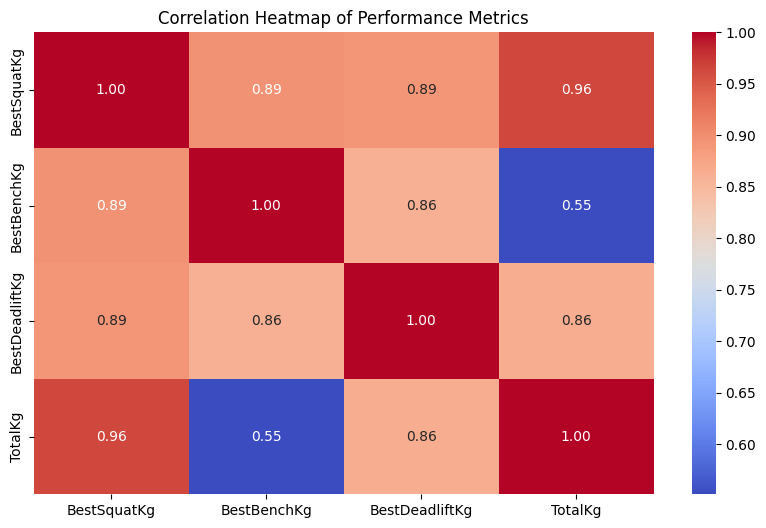

In [24]:
#Visual 1 - Heatmap
# Prepare data for the heatmap
correlation_data = combined_df[['BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg']]
correlation_matrix = correlation_data.corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Performance Metrics')
plt.show()

Answer to research question:
The provided correlation heatmap illustrates the relationships between different performance metrics in powerlifting.
* High Correlations: There are strong positive correlations between all three individual performance metrics (`BestSquatKg`, `BestBenchKg`, `BestDeadliftKg`) and the total score (`TotalKg`). This indicates that athletes who excel in one lift tend to perform well in the others, suggesting a degree of interdependence between these metrics.
* Moderate Correlation: While the correlations between individual metrics and the total score are strong, the correlation between `BestBenchKg` and `BestDeadliftKg` is slightly lower(0.86). This may suggest that these two lifts are more independent of each other compared to the relationship between squat and deadlift or squat and bench press.
* No Negative Correlations: All correlations in the heatmap are positive, indicating that there are no inverse relationships between the performance metrics. This suggests that improving performance in one lift does not necessarily come at the expense of performance in another.

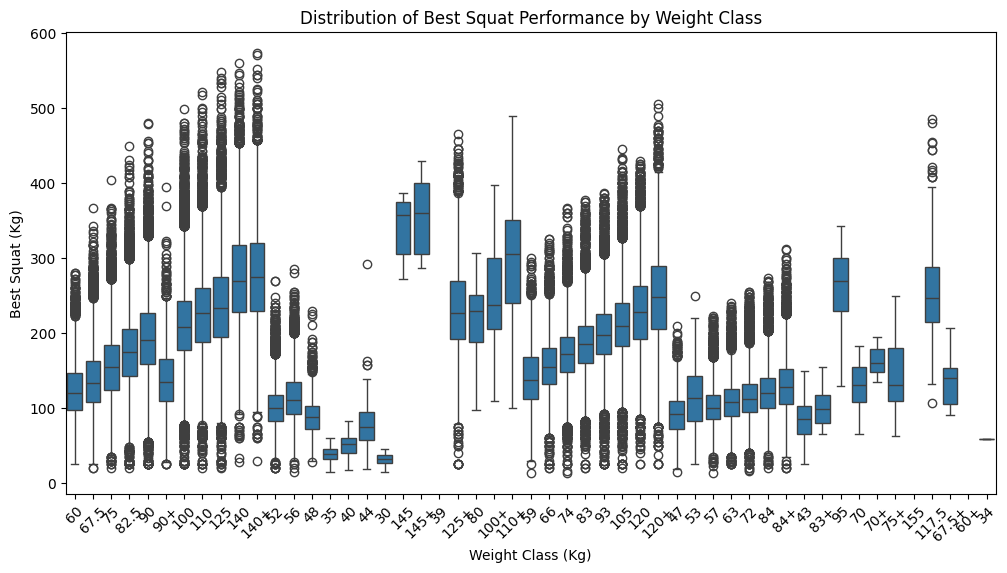

In [25]:
#Visual 2 - Box Plot
# Create a box plot to compare BestSquatKg by WeightClassKg
plt.figure(figsize=(12, 6))
sns.boxplot(x='WeightClassKg', y='BestSquatKg', data=combined_df)
plt.title('Distribution of Best Squat Performance by Weight Class')
plt.xticks(rotation=45)
plt.xlabel('Weight Class (Kg)')
plt.ylabel('Best Squat (Kg)')
plt.show()


*Answer to research question:* 
The box plot illustrates the distribution of best squat performance across different weight classes in powerlifting, we can observe several key performance patterns:
* Increasing Performance with Weight Class: As the weight class increases, the overall level of best squat performance tends to rise. This suggests that heavier athletes are generally able to lift more weight in the squat compared to their lighter counterparts.
* Variability within Weight Classes: While there is a general trend of increasing performance with weight class, there is also considerable variability within each weight class. This indicates that individual factors, such as technique, training, and genetics, play a significant role in determining squat performance beyond weight class alone.
* Outliers: The box plot reveals the presence of outliers, which are data points that fall outside the typical range of values within a weight class. These outliers could represent exceptional athletes who significantly outperform their peers or potential errors in data collection.
* Distribution of Performance: The shape of the box plots provides insights into the distribution of squat performances within each weight class. For example, some weight classes may have a more symmetrical distribution, while others may exhibit a skewed distribution, suggesting that performance is concentrated towards one end of the range.

### **5.2:** Reflection


*Answer:* If I had more time to complete this project, I would:
* Investigate data quality issues more thoroughly, such as missing values, outliers, and inconsistencies, to ensure the accuracy and reliability of the analysis.
* An additional research question would explore how demographic factors influence performance metrics, such as age, gender, and experience level.
* Another research question would aim to identify trends or disparities among different athlete groups.